In [1]:
install.packages("caret")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# Read CSV

In [14]:
df <- read.csv("ObesityDataSet.csv")
head(df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
5,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
6,Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight


In [20]:
sprintf("data dimension: %d %d", dim(df)[1], dim(df)[2])
sapply(df, class)

[1] "data dimension: 2111 17"

Gender                            Age 
                   "character"                      "numeric" 
                        Height                         Weight 
                     "numeric"                      "numeric" 
family_history_with_overweight                           FAVC 
                   "character"                    "character" 
                          FCVC                            NCP 
                     "numeric"                      "numeric" 
                          CAEC                          SMOKE 
                   "character"                    "character" 
                          CH2O                            SCC 
                     "numeric"                    "character" 
                           FAF                            TUE 
                     "numeric"                      "numeric" 
                          CALC                         MTRANS 
                   "character"                    "character" 
                    NObeyesdad 
                   "character"

# EDA

In [76]:
cleaned_df <- transform(df, 
                        Gender = as.factor(Gender), 
                        Age = as.integer(Age),
                        family_history_with_overweight = as.factor(family_history_with_overweight), 
                        FAVC = as.factor(FAVC), 
                        FCVC = as.integer(FCVC),
                        NCP = as.integer(NCP),
                        CAEC = as.factor(CAEC),
                        SMOKE = as.factor(SMOKE), 
                        SCC = as.factor(SCC), 
                        FAF = as.integer(FAF),
                        CALC = as.factor(CALC), 
                        MTRANS = as.factor(MTRANS), 
                        NObeyesdad = as.factor(NObeyesdad))
head(cleaned_df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
,<fct>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<fct>,<int>,<dbl>,<fct>,<fct>,<fct>
1,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
5,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
6,Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight


In [50]:
sapply(df, function(x)all(is.na(x)))


Gender                            Age 
                         FALSE                          FALSE 
                        Height                         Weight 
                         FALSE                          FALSE 
family_history_with_overweight                           FAVC 
                         FALSE                          FALSE 
                          FCVC                            NCP 
                         FALSE                          FALSE 
                          CAEC                          SMOKE 
                         FALSE                          FALSE 
                          CH2O                            SCC 
                         FALSE                          FALSE 
                           FAF                            TUE 
                         FALSE                          FALSE 
                          CALC                         MTRANS 
                         FALSE                          FALSE 
                    NObeyesdad 
                         FALSE

## Plotting


Female   Male 
  1043   1068 


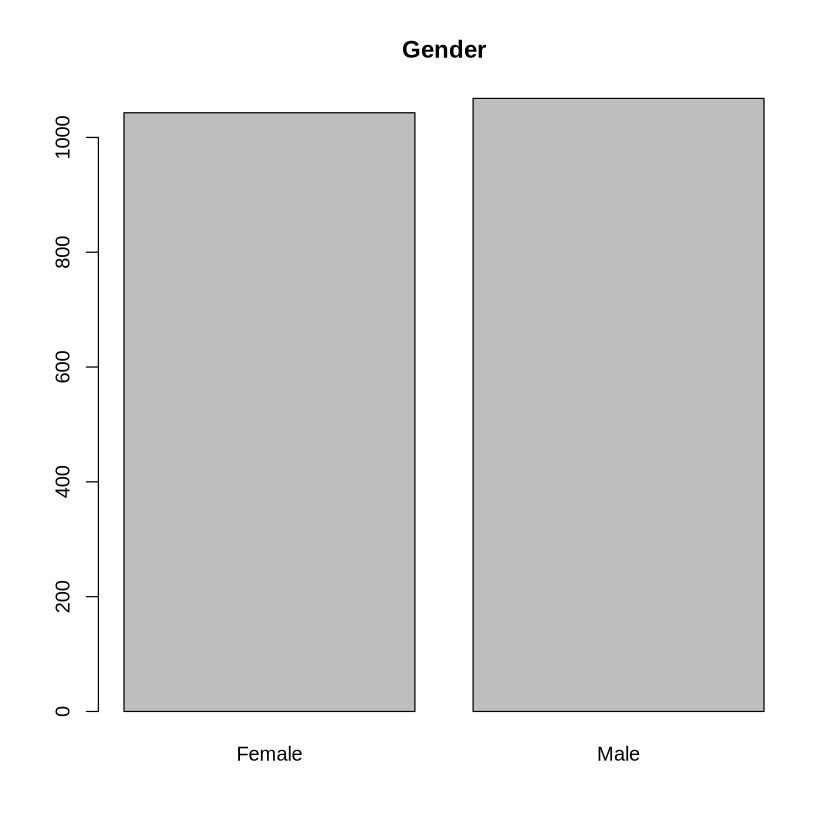

In [61]:
print(table(df$Gender))
barplot(table(df$Gender), main="Gender")


  no  yes 
 385 1726 


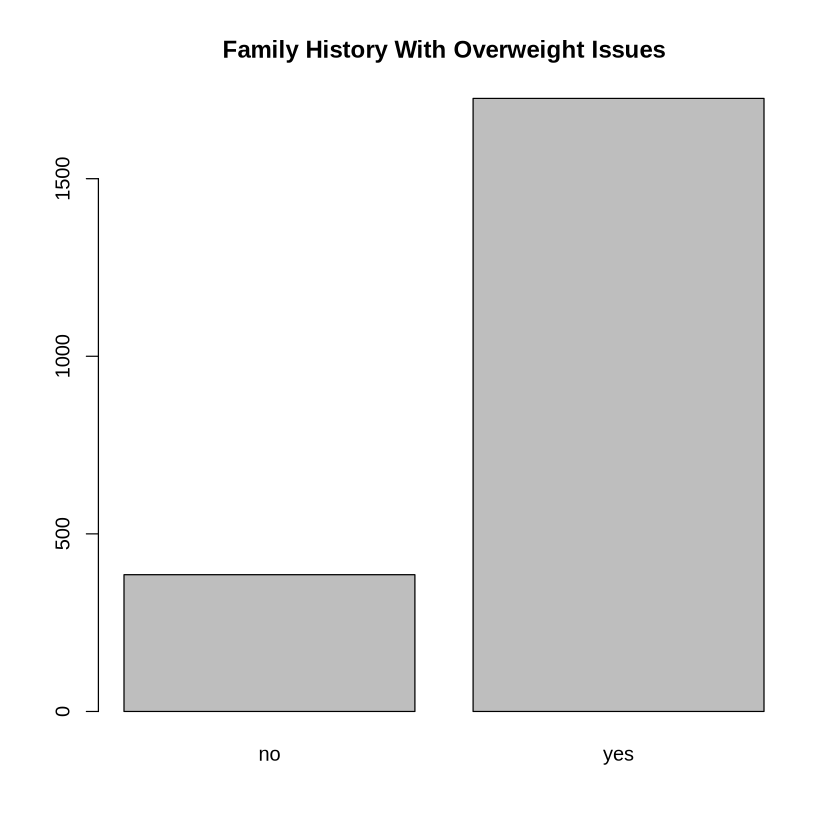

In [60]:
print(table(df$family_history_with_overweight))
barplot(table(df$family_history_with_overweight), main="Family History With Overweight Issues")


  no  yes 
 245 1866 


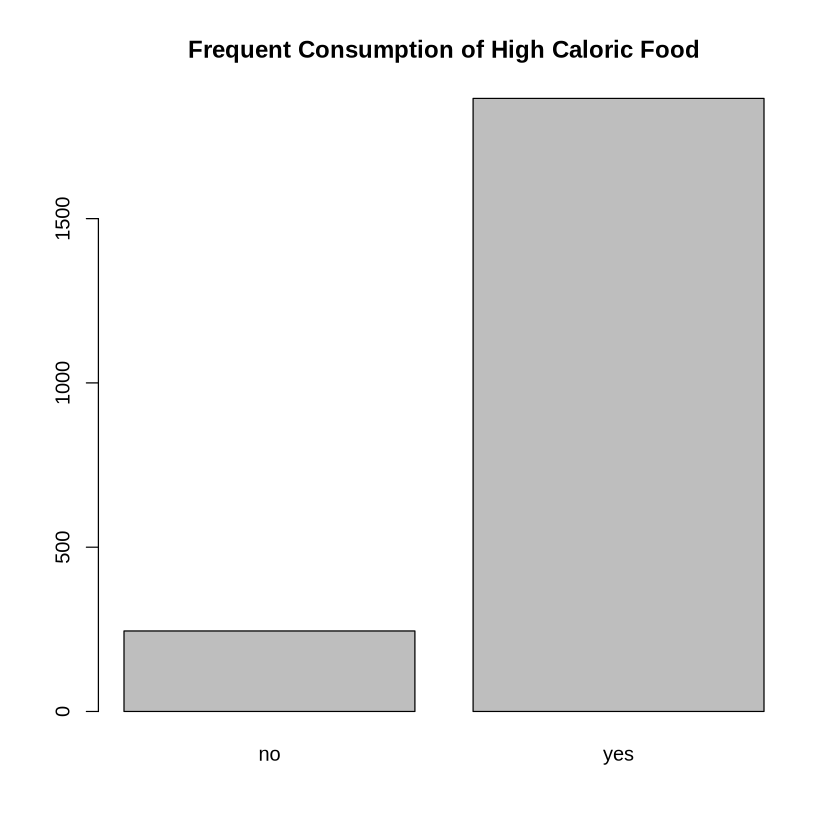

In [63]:
print(table(df$FAVC))
barplot(table(df$FAVC), main="Frequent Consumption of High Caloric Food")


    Always Frequently         no  Sometimes 
        53        242         51       1765 


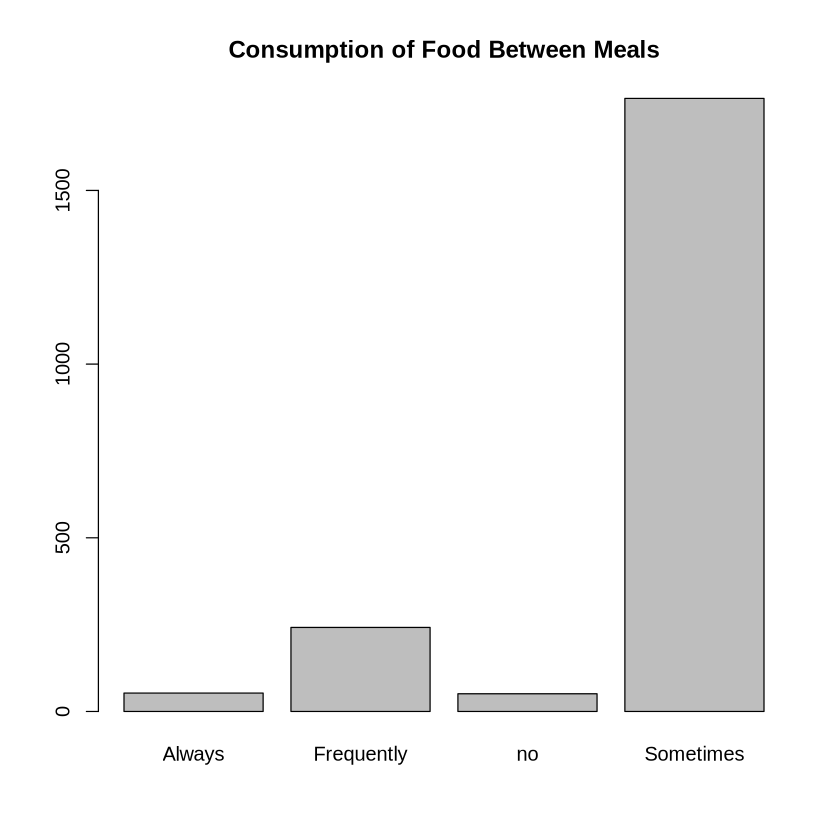

In [77]:
print(table(df$CAEC))
barplot(table(df$CAEC), main="Consumption of Food Between Meals")


  no  yes 
2067   44 


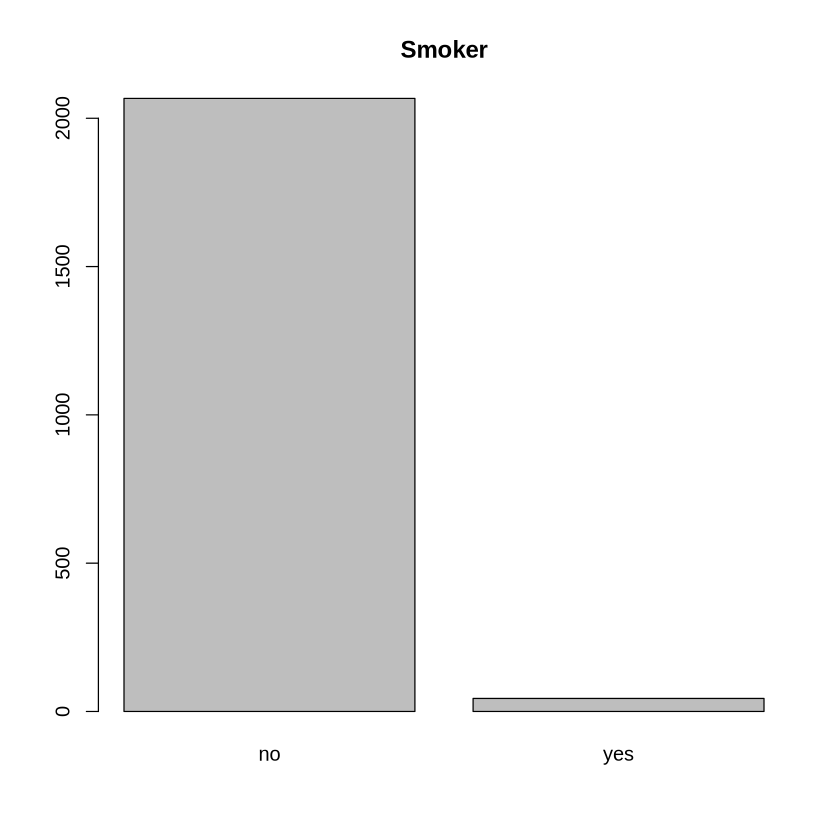

In [78]:
print(table(df$SMOKE))
barplot(table(df$SMOKE), main="Smoker")


  no  yes 
2015   96 


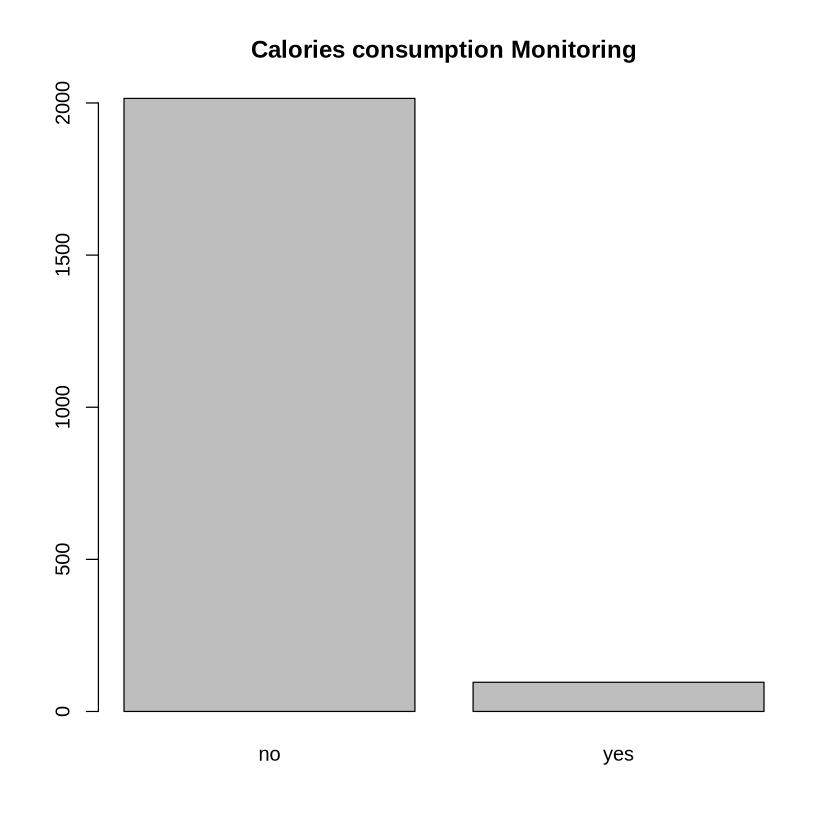

In [85]:
print(table(df$SCC))
barplot(table(df$SCC), main="Calories consumption Monitoring")


    Always Frequently         no  Sometimes 
         1         70        639       1401 


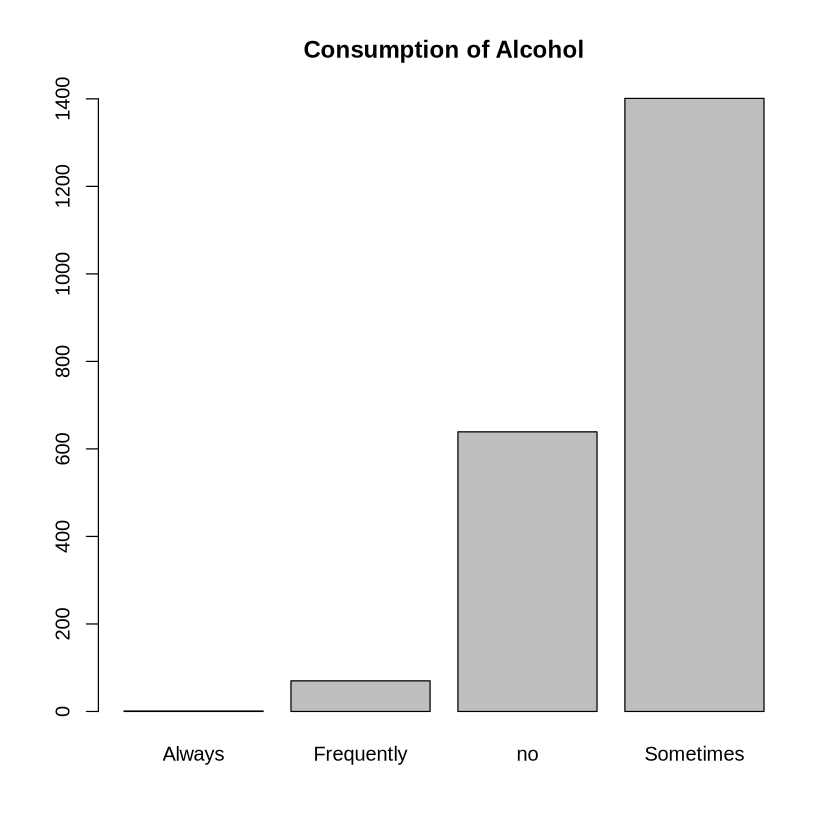

In [86]:
print(table(df$CALC))
barplot(table(df$CALC), main="Consumption of Alcohol")


           Automobile                  Bike             Motorbike 
                  457                     7                    11 
Public_Transportation               Walking 
                 1580                    56 


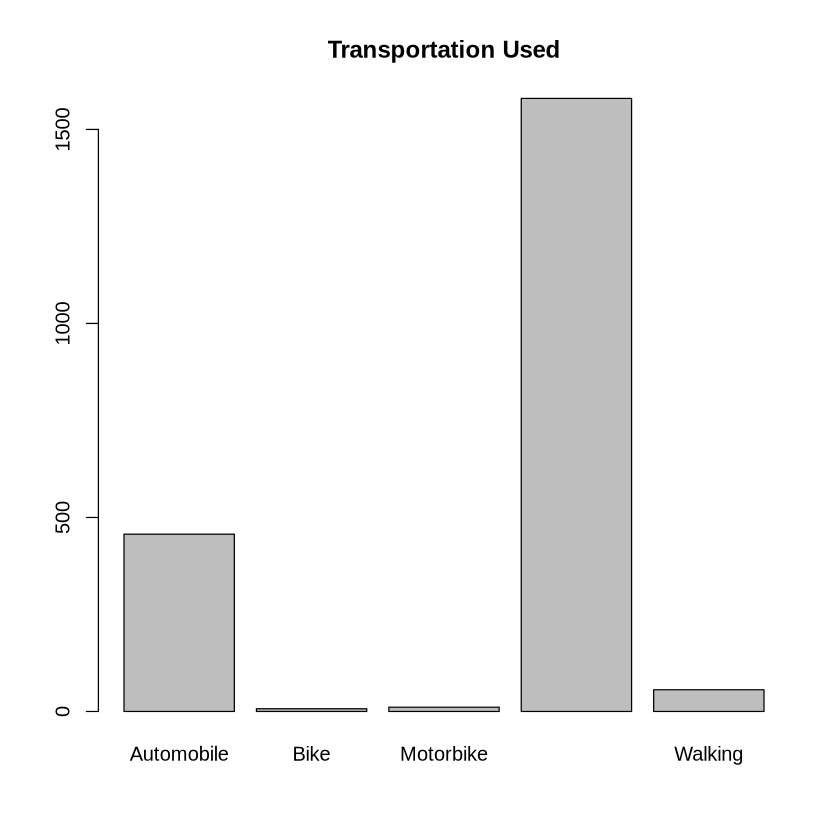

In [88]:
print(table(df$MTRANS))
barplot(table(df$MTRANS), main="Transportation Used")